In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

sns.set_palette('husl')

In [2]:
df = pd.read_pickle('data/processed.pickle')
df.head()

,key,title,authors,abstract,year_published,tags,category,skills,skill_cat,types,lang_family
0,rayyan-354359269,An experience of automated assessment in a lar...,"Zampirolli F.A., Borovina Josko J.M., Venero M...",The 2020 pandemic imposed new demands on teach...,2021,"[data_available:False, technique:pre_defined_q...",[dynamic],[correctness],[correctness_dynamic],"[description, evaluation]",[OOP]
1,rayyan-354359270,Semiautomatic generation and assessment of Jav...,"Insa D., Pérez S., Silva J., Tamarit S.",Continuous assessment is essential in educatio...,2021,"[skill:correctness, tool:javassess, interactio...","[dynamic, static]",[correctness],"[correctness_dynamic, correctness_static]","[description, evaluation]",[OOP]
2,rayyan-354359271,A tool for evaluating computer programs from s...,"Vaneck Q., Colart T., Frénay B., Vanderose B.",Computer science studies are more and more pop...,2021,"[data_available:False, tool:pylint, language:p...",[static],"[readability, maintainability]","[readability_static, maintainability_static]",[description],[OOP]
3,rayyan-354359272,Virtual Teaching Assistant for Grading Program...,"Chou C.-Y., Chen Y.-J.",This study proposes an automated programming a...,2021,"[data_available:False, skill:correctness, inte...","[dynamic, static]",[correctness],"[correctness_dynamic, correctness_static]","[description, evaluation]",[Unknown]
4,rayyan-354359273,Analysis of an automatic grading system within...,"Hegarty-Kelly E., Mooney D.A.",Reliable and pedagogically sound automated fee...,2021,"[data_available:False, skill:correctness, inte...","[dynamic, static]",[correctness],"[correctness_dynamic, correctness_static]","[description, evaluation]",[OOP]


# Meta-Data
### Years Published

In [3]:
count_years = df.year_published.value_counts().reset_index().rename(columns={'index': 'year_published', 'year_published': 'no_published'})
count_years.head()

,year_published,no_published
0,2020,28
1,2021,27
2,2019,25
3,2018,21
4,2017,20


In [4]:
count_years.no_published.sum()

121

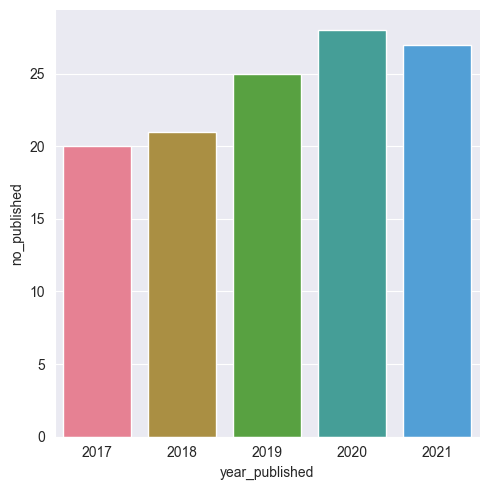

In [5]:
sns.catplot(count_years, kind='bar', x='year_published', y='no_published')
plt.savefig('plots/years_published.pdf')

## Paper Types

In [6]:
# Scaling up Functional Programming Education: Under the Hood of the OCaml MOOC

paper_types = pd.Series([paper_type for paper_type in df.types]).value_counts().reset_index()
paper_types.columns = ["paper_type", 'no_type']
paper_types['proportion'] = (paper_types.no_type / paper_types.no_type.sum()) * 100
paper_types.paper_type = paper_types.paper_type.astype(str)
paper_types

,paper_type,no_type,proportion
0,"['description', 'evaluation']",82,67.768595
1,['evaluation'],17,14.049587
2,['description'],11,9.090909
3,['experience'],11,9.090909


In [7]:
paper_types.no_type.sum()

121

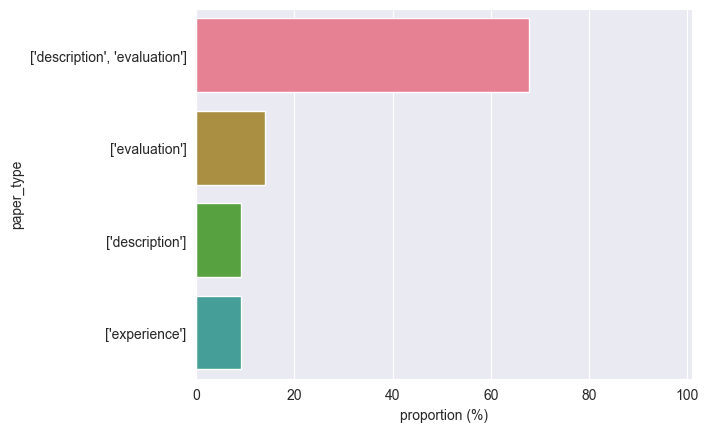

In [8]:
ax_type = sns.barplot(paper_types, y='paper_type', x='proportion')
ax_type.set(xlabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/paper_types.pdf', bbox_inches='tight')

## Degree of Automation

In [9]:
auto = pd.Series([tag.replace('approach:', '') for tags in df.tags for tag in tags if tag.startswith('approach')]).value_counts().reset_index()
auto.columns = ["degree_of_automation", 'number']
auto['proportion'] = (auto.number / auto.number.sum()) * 100
auto.head()

,degree_of_automation,number,proportion
0,fully_automated,99,81.818182
1,semi_automatic,17,14.049587
2,unclear,5,4.132231


In [10]:
auto.number.sum()

121

In [11]:
pd.concat([df.title, df.tags.apply(lambda labels: [label for label in labels if 'approach' in label])], axis=1)

,title,tags
0,An experience of automated assessment in a lar...,[approach:fully_automated]
1,Semiautomatic generation and assessment of Jav...,[approach:semi_automatic]
2,A tool for evaluating computer programs from s...,[approach:fully_automated]
3,Virtual Teaching Assistant for Grading Program...,[approach:semi_automatic]
4,Analysis of an automatic grading system within...,[approach:fully_automated]
...,...,...
116,Automated data-driven hints for computer progr...,[approach:fully_automated]
117,Learning and teaching numerical methods with a...,[approach:fully_automated]
118,Ask-Elle: an Adaptable Programming Tutor for H...,[approach:fully_automated]
119,An AI system for coaching novice programmers,[approach:fully_automated]


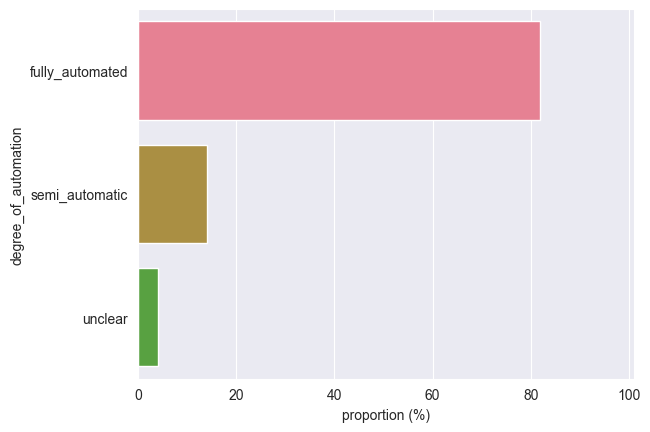

In [12]:
ax_doa = sns.barplot(auto, y='degree_of_automation', x='proportion')
ax_doa.set(xlabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/auto_degree.pdf', bbox_inches='tight')

## Interaction type

In [13]:
inter = pd.Series([tag.replace('interaction:', '') for tags in df.tags for tag in tags if tag.startswith('interaction')]).value_counts().reset_index()
inter.columns = ["interaction", 'number']
inter['proportion'] = (inter.number / inter.number.sum()) * 100
inter.head()

,interaction,number,proportion
0,unknown,50,41.322314
1,multiple,50,41.322314
2,single,18,14.876033
3,none,3,2.479339


In [14]:
inter.number.sum()

121

In [15]:
pd.concat([df.title, df.tags.apply(lambda labels: [label for label in labels if 'interaction' in label])], axis=1)

,title,tags
0,An experience of automated assessment in a lar...,[interaction:unknown]
1,Semiautomatic generation and assessment of Jav...,[interaction:unknown]
2,A tool for evaluating computer programs from s...,[interaction:unknown]
3,Virtual Teaching Assistant for Grading Program...,[interaction:multiple]
4,Analysis of an automatic grading system within...,[interaction:unknown]
...,...,...
116,Automated data-driven hints for computer progr...,[interaction:multiple]
117,Learning and teaching numerical methods with a...,[interaction:multiple]
118,Ask-Elle: an Adaptable Programming Tutor for H...,[interaction:multiple]
119,An AI system for coaching novice programmers,[interaction:unknown]


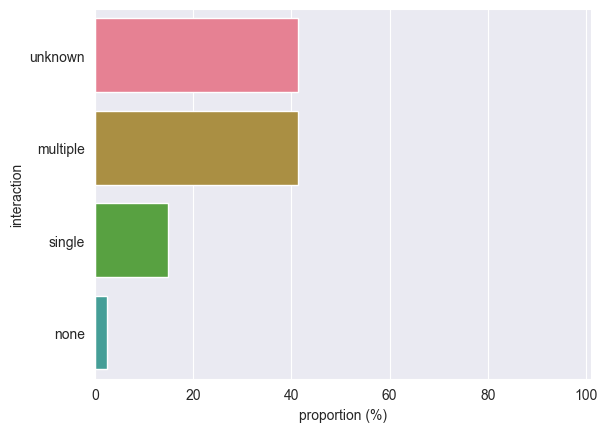

In [16]:
ax_int = sns.barplot(inter, y='interaction', x='proportion')
ax_int.set(xlabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/interaction.pdf', bbox_inches='tight')

# Skills

In [42]:
skills = pd.Series([skill for skill in df.skills]).value_counts().reset_index()
skills.columns = ["skills", 'number']

skills['proportion'] = (skills.number / skills.number.sum()) * 100
skills.skills = skills.skills.astype(str)
skills

,skills,number,proportion
0,['correctness'],80,66.115702
1,"['correctness', 'readability']",19,15.702479
2,"['correctness', 'readability', 'maintainability']",7,5.785124
3,"['correctness', 'maintainability']",5,4.132231
4,"['readability', 'maintainability']",4,3.305785
5,['readability'],4,3.305785
6,"['correctness', 'documentation']",1,0.826446
7,['maintainability'],1,0.826446


In [18]:
skills.number.sum()

121

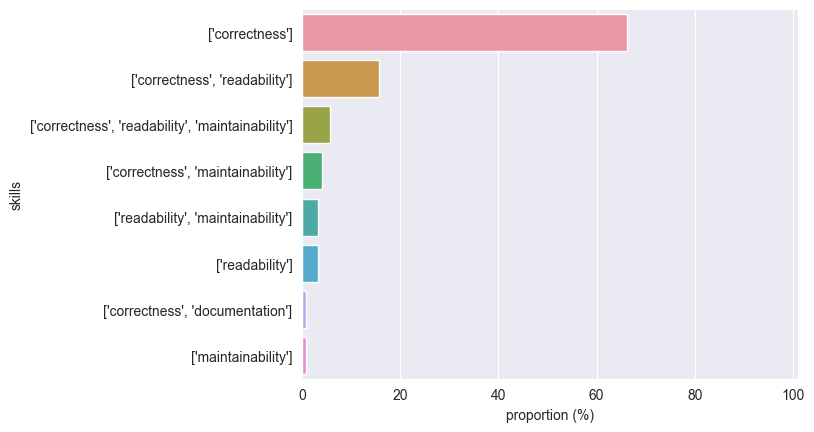

In [19]:
ax_skill = sns.barplot(skills, y='skills', x='proportion')
ax_skill.set(xlabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/skills.pdf', bbox_inches='tight')

# Skill-Category Complete Mapping
## 1D Plots

In [20]:
skill_cat_count = df.skill_cat.value_counts().reset_index()
skill_cat_count.columns = ["skill_cat", 'number']
skill_cat_count['proportion'] = (skill_cat_count.number / skill_cat_count.number.sum()) * 100
skill_cat_count.skill_cat = skill_cat_count.skill_cat.astype(str)
skill_cat_count.head()

,skill_cat,number,proportion
0,['correctness_dynamic'],40,33.057851
1,"['correctness_dynamic', 'correctness_static']",21,17.355372
2,['correctness_static'],17,14.049587
3,"['readability_static', 'correctness_dynamic']",11,9.090909
4,"['readability_static', 'maintainability_static']",4,3.305785


In [21]:
skill_cat_count.number.sum()

121

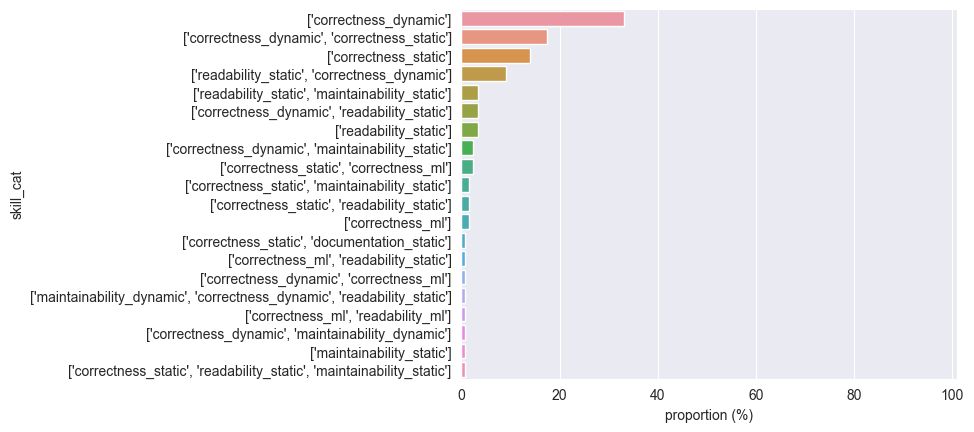

In [45]:
ax_skill_cat = sns.barplot(skill_cat_count[skill_cat_count.number > 0], y='skill_cat', x='proportion')
ax_skill_cat.set(xlabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/skill_cat.pdf', bbox_inches='tight')

In [23]:
skill_cat_exp = df.explode('skill_cat').skill_cat.value_counts().reset_index()
skill_cat_exp.columns = ["skill_cat", 'number']
skill_cat_exp['proportion'] = (skill_cat_exp.number / skill_cat_exp.number.sum()) * 100
skill_cat_exp.head()

,skill_cat,number,proportion
0,correctness_dynamic,82,45.555556
1,correctness_static,47,26.111111
2,readability_static,28,15.555556
3,maintainability_static,11,6.111111
4,correctness_ml,8,4.444444


In [24]:
skill_cat_exp.number.sum()

180

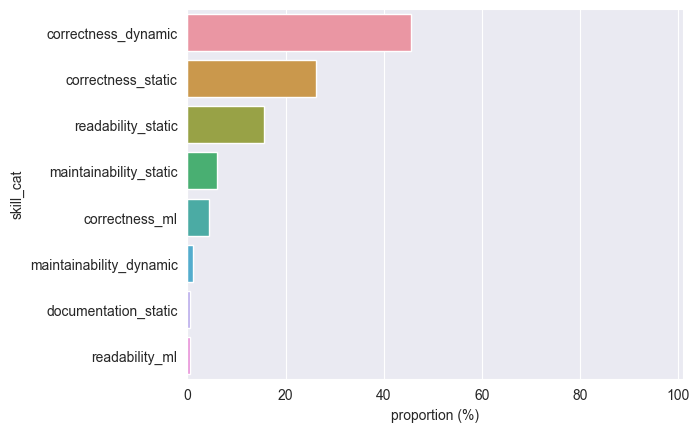

In [25]:
ax_skill_cat_exp = sns.barplot(skill_cat_exp, y='skill_cat', x='proportion')
ax_skill_cat_exp.set(xlabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/skill_cat_exp.pdf', bbox_inches='tight')

## Skill Category 2D plots

In [26]:
skill_cat_2d = df[['title', 'skill_cat']].explode('skill_cat').copy()
skill_cat_2d.head()

,title,skill_cat
0,An experience of automated assessment in a lar...,correctness_dynamic
1,Semiautomatic generation and assessment of Jav...,correctness_dynamic
1,Semiautomatic generation and assessment of Jav...,correctness_static
2,A tool for evaluating computer programs from s...,readability_static
2,A tool for evaluating computer programs from s...,maintainability_static


In [27]:
split_df = skill_cat_2d.skill_cat.str.split('_', expand=True)
skill_cat_2d_split = pd.concat([skill_cat_2d, split_df],axis=1).drop(columns='skill_cat')
skill_cat_2d_split.columns = ['title', 'skill', 'category']
skill_cat_2d_split.head()

,title,skill,category
0,An experience of automated assessment in a lar...,correctness,dynamic
1,Semiautomatic generation and assessment of Jav...,correctness,dynamic
1,Semiautomatic generation and assessment of Jav...,correctness,static
2,A tool for evaluating computer programs from s...,readability,static
2,A tool for evaluating computer programs from s...,maintainability,static


In [28]:
skill_cat_2d_grp = skill_cat_2d_split.groupby(['skill', 'category']).count().reset_index()
skill_cat_2d_grp.columns = ['skill', 'category', 'number']
skill_cat_2d_grp = skill_cat_2d_grp.sort_values('number', ascending=False)
skill_cat_2d_grp.head()

,skill,category,number
0,correctness,dynamic,82
2,correctness,static,47
7,readability,static,28
5,maintainability,static,11
1,correctness,ml,8


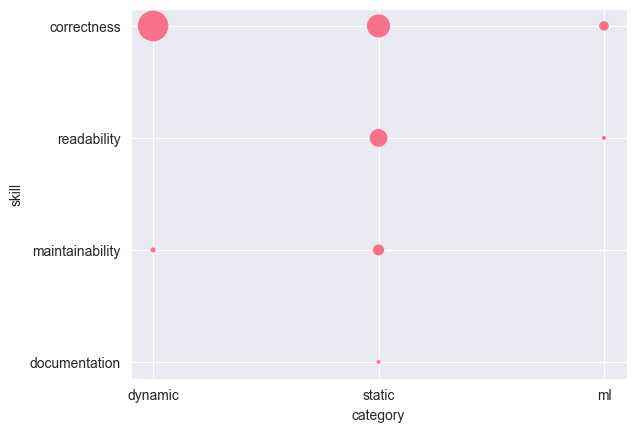

In [29]:
sns.scatterplot(skill_cat_2d_grp, y='skill', x='category', size='number', sizes=(10, 500), legend=False)
plt.savefig('plots/skill_cat_2d_bubble.pdf', bbox_inches='tight')

### Bipartie

In [60]:
skill_cat_bp = skill_cat_2d_grp.copy()

skill_cat_bp.skill = skill_cat_bp.skill.map(lambda x: x[:4])
skill_cat_bp.category = skill_cat_bp.category.map(lambda x: x[:4])

skill_cat_bp

,skill,category,number
0,corr,dyna,82
2,corr,stat,47
7,read,stat,28
5,main,stat,11
1,corr,ml,8
4,main,dyna,2
3,docu,stat,1
6,read,ml,1


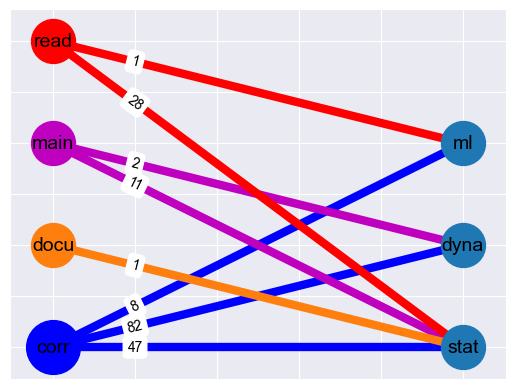

In [61]:
# Adapted from documentation
# TODO change nodes to text

B = nx.Graph()
B.add_nodes_from(['corr', 'read', 'main', 'docu'], bipartite=0)
B.add_nodes_from(['dyna', 'stat', 'ml'], bipartite=1)

bp_raw = list(skill_cat_bp.itertuples(index=False,name=None))

for e in bp_raw:
    B.add_edge(e[0], e[1], weight=e[2])


# Separate by group
l, r = nx.bipartite.sets(B)
pos = {}

# Update position for node from each group
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))


# nodes
nx.draw_networkx_nodes(B, pos, node_size=1500, nodelist=['corr'], node_color='b')
nx.draw_networkx_nodes(B, pos, node_size=1000, nodelist=['main'], node_color='m')
nx.draw_networkx_nodes(B, pos, node_size=1000, nodelist=['read'], node_color='r')
nx.draw_networkx_nodes(B, pos, node_size=1000, nodelist=['docu'], node_color='tab:orange')
nx.draw_networkx_nodes(B, pos, node_size=1000, nodelist=['ml', 'stat', 'dyna'])

# edges
e_c = [(u, v) for (u, v, d) in B.edges(data=True) if u == 'corr']
e_m = [(u, v) for (u, v, d) in B.edges(data=True) if u == 'main']
e_r = [(u, v) for (u, v, d) in B.edges(data=True) if u == 'read']
e_d = [(u, v) for (u, v, d) in B.edges(data=True) if u == 'docu']

nx.draw_networkx_edges(B, pos, width=6, edgelist=e_c, edge_color='b')
nx.draw_networkx_edges(B, pos, width=6, edgelist=e_m, edge_color='m')
nx.draw_networkx_edges(B, pos, width=6, edgelist=e_r, edge_color='r')
nx.draw_networkx_edges(B, pos, width=6, edgelist=e_d, edge_color='tab:orange')

# node labels
nx.draw_networkx_labels(B, pos, font_size=14, font_family="sans-serif")

# edge weight labels
edge_labels = nx.get_edge_attributes(B, "weight")

nx.draw_networkx_edge_labels(B, pos, edge_labels, label_pos=0.8)
plt.savefig('plots/skill_cat_bipartie.png')

## Skill Category Over Time
### Skill Category Combined

In [32]:
skill_cat_time = df[['skill_cat', 'year_published']].copy()
skill_cat_time = skill_cat_time.explode('skill_cat')
skill_cat_time.head()

,skill_cat,year_published
0,correctness_dynamic,2021
1,correctness_dynamic,2021
1,correctness_static,2021
2,readability_static,2021
2,maintainability_static,2021


In [33]:
skill_cat_time_grp = skill_cat_time.copy()
skill_cat_time_grp.skill_cat = skill_cat_time_grp.skill_cat.astype(str)
skill_cat_time_grp.year_published = skill_cat_time_grp.year_published.astype(str)
skill_cat_time_grp['cumulative_sum'] = 0
skill_cat_time_grp = skill_cat_time_grp.groupby(['skill_cat', 'year_published']).count().groupby(level=0).cumsum().reset_index()

skill_cat_time_grp.head()

,skill_cat,year_published,cumulative_sum
0,correctness_dynamic,2017,10
1,correctness_dynamic,2018,24
2,correctness_dynamic,2019,38
3,correctness_dynamic,2020,63
4,correctness_dynamic,2021,82


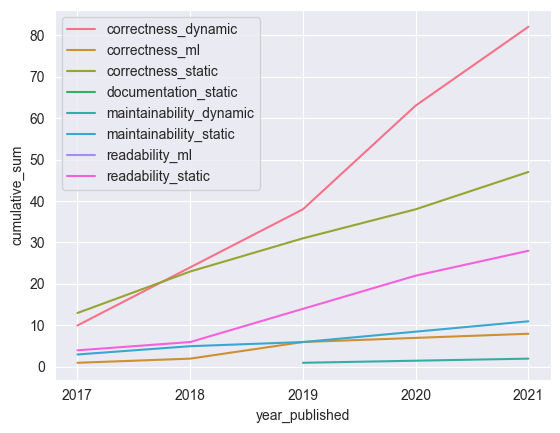

In [34]:
sns.lineplot(skill_cat_time_grp, x='year_published', y='cumulative_sum', hue='skill_cat')
plt.legend(loc='upper left')
plt.savefig('plots/skill_cat_time.pdf')

### Skill Category Split

In [35]:
skill_cat_time_s = df[['skill_cat', 'year_published']].copy()
skill_cat_time_s = skill_cat_time_s.explode('skill_cat')
split = skill_cat_time_s.skill_cat.str.split('_', expand=True)
skill_cat_time_s = pd.concat([skill_cat_time_s, split], axis=1)
skill_cat_time_s = skill_cat_time_s.drop(columns='skill_cat')
skill_cat_time_s.columns = ['year_published', 'skill', 'category']
skill_cat_time_s.head()

,year_published,skill,category
0,2021,correctness,dynamic
1,2021,correctness,dynamic
1,2021,correctness,static
2,2021,readability,static
2,2021,maintainability,static


In [36]:
skill_cat_time_s['total'] = 0
skill_cat_s_g = skill_cat_time_s.groupby(['year_published', 'skill', 'category']).count().reset_index().sort_values(['skill', 'category'])
skill_cat_s_g

,year_published,skill,category,total
0,2017,correctness,dynamic,10
6,2018,correctness,dynamic,14
11,2019,correctness,dynamic,14
18,2020,correctness,dynamic,25
22,2021,correctness,dynamic,19
1,2017,correctness,ml,1
7,2018,correctness,ml,1
12,2019,correctness,ml,4
19,2020,correctness,ml,1
23,2021,correctness,ml,1


In [66]:
colors = {2017:'b', 2018:'g', 2019:'r', 2020:'c', 2021:'m'}

def plot_years(sub_ax, skill, cat):

    temp_df = skill_cat_s_g[skill_cat_s_g.skill == skill]
    temp_df = temp_df[temp_df.category == cat]

    for index, row in temp_df.iterrows():
        x = [row.year_published for i in range(row.total)]
        y = [random.uniform(1, 2) for i in range(row.total)]

        sub_ax.scatter(x, y, c=colors[row.year_published], label=row.year_published)
        sub_ax.set(ylim=[0.5, 2.5])



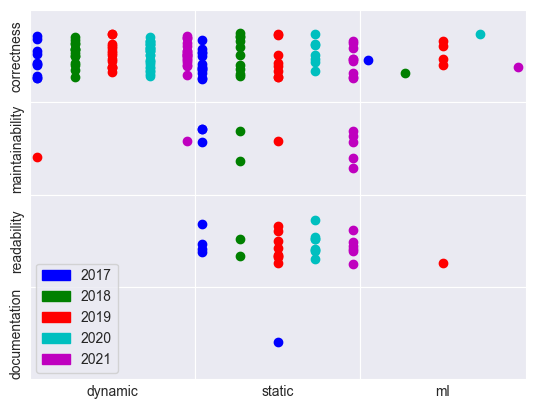

In [67]:
# TODO: change to have points in line per year

import random
import numpy as np
import matplotlib.patches as mpatches

fig = plt.figure()
grid = fig.add_gridspec(4, 3, wspace=0, hspace=0)

axs = grid.subplots()

skills = ['correctness', 'maintainability', 'readability', 'documentation']
category = ['dynamic', 'static', 'ml']

for (s, c), ax in np.ndenumerate(axs):
    plot_years(ax, skills[s], category[c])
    ax.set(xticks=[], yticks=[], xlabel=category[c])

    if c == 0:
        ax.set(ylabel=skills[s])

    if c == 0 and s == 3:
        patches = [mpatches.Patch(color=color, label=year) for year, color in colors.items()]
        ax.legend(handles=patches, loc='lower left')


plt.savefig('plots/skill_cat_time_sep.pdf')